<a href="https://colab.research.google.com/github/invest41/Surviving-the-Titanic/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook contains a practical use case for predictive analysis which involves:
- Building Machine Learning models
- Using proper computational algorithms to derive insights from real-life historical Data
- Also Involves an interactive session where we answer the question - Would you have survived the Titanic?
- Lastly, Some key graphs on survivor demographics

**Step 1: Establish a Working Environment**

In [ ]:
#6:08am 14-02-2021
#Creating the right environment - Library and Module Import
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as GNB
 
from sklearn.metrics import accuracy_score as acsc
from sklearn.model_selection import train_test_split as tts
import joblib, time
print('Library Import Complete...')

Library Import Complete...


**Step 2: Training Models and Exporting it**

In [ ]:
#6:12am 14-02-2021
#Training and Storing Models
 
#1.0
df = pd.read_csv('train.csv')
 
#2.0 - Represent the Dimorphic Sex
df['Sex'][df['Sex']=='male'], df['Sex'][df['Sex']=='female'] = 1, 0
 
#3.0 - Label Datasets
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare']]
Y = df[['Survived']]
 
#4.0 - Circumvent Null Error (Data Cleaning)
X['Age'][X[X['Age'].isnull()].index] = 0
 
 
 
#5.0
m1 = m2 = mt = count = 0
tick = time.time()
while True:
 #X1,X2,Y1,Y2 = tts(X,Y)
 if (m1 == 1 or m2==1) and mt==0: 
   print(f'{count} Trial(s)')
   mt=1
 count+=1
 model1 = DTC()
 model1.fit(X,Y)
 
 model2 = GNB()
 model2.fit(X,Y['Survived'])
 
 #5.1 - Regurgitative Prediction
 pred1 = model1.predict(X)
 pred2 = model2.predict(X)
 
 score1 = round(((acsc(Y,pred1))*100),1)
 score2 = round(((acsc(Y,pred1))*100),1)
 
 if score1>60 and m1==0:
   m1+=1
   tickk = time.time()
   print(f'Data Size: {X.size} people\nDecision Tree Accuracy: {score1}%\nTime: {round(((tickk-tick)*1000),2)}ms')
   
   #5.21 - Save Model
   joblib.dump(model1,'titanic-survival_DTC.joblib')
 
 if score2>60 and m2==0:
   m2+=1
   tock = time.time()
   print(f'\nData Size: {X.size} people\nGausian NB Accuracy: {score2}%\nTime: {round(((tock-tick)*1000),2)}ms')
   
   #5.22 - Save Model
   joblib.dump(model2,'titanic-survival_GNB.joblib')
 
 if m1==m2==1: 
   print(f'\n{count} Trial(s)\n\n\n')
   break

Data Size: 5346 people
Decision Tree Accuracy: 98.2%
Time: 8.37ms

Data Size: 5346 people
Gausian NB Accuracy: 98.2%
Time: 10.34ms

1 Trial(s)





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1060: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_labels(key, value)
/usr/local/lib/python3.6/dist-packag

**Step 3: Loading Model and Utilities for use on NEW DATA**

In [ ]:
#6:26am 14-02-2021
#Testing Model
 
#1.0
td = pd.read_csv('test.csv')
ed = pd.read_csv('gender_submission.csv')
 
#2.0 - Represent Dimorphic Sex
td['Sex'][td['Sex']=='male'], td['Sex'][td['Sex']=='female']= 1, 0
 
#3.0 - Label Dataset
test_data = td[['Pclass','Sex','Age','SibSp','Parch','Fare']]
expected = ed[['Survived']]
 
 
#test_size = int(float(input('Input Test Size Ratio: ')) * test_data.shape[0])
test_size = test_data.shape[0]
 
 
 
#4.0 - Circumvent Null Error
 
#4.1 - Recognise Error
#print(test_data[test_data['Age'].isnull()])
#print(expected[expected['Survived'].isnull()])
 
#4.2 - Fix Error
try:
  test_data['Fare'][test_data[test_data['Fare'].isnull()].index] = 0
  test_data['Age'][test_data[test_data['Age'].isnull()].index] = 0
except BaseException as be: print(be)
#test_data = test_data.dropna()
 
#4.3 - Confirm Fix
print('Fixed Error:',not np.any(test_data.isnull()))
print(f'Input Data: {test_data.shape}\nOutput Data: {expected.shape}')
 
 
 
#5.0 - Test Model
model = joblib.load('titanic-survival_DTC.joblib')
 
 
pred = model.predict((test_data.iloc[:test_size]))
score = round(((acsc(expected.iloc[:test_size],pred))*100),1)
print(f'Accuracy: {score}%\n\n\n')

Fixed Error: True
Input Data: (418, 6)
Output Data: (418, 1)
Accuracy: 76.3%





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1060: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_labels(key, value)
/usr/local/lib/python3.6/dist-packages/IPython/core

**Step 4: Practical Use Case**
 
Check your chance at surviving the Titanic - **Interactive Session**

In [ ]:
#Practical Use Case
#Check your chance at surviving the Titanic
#11:00pm 14-02-2021
 
#1.0
surv, arr = "", []
 
 
#2.0
print(f'Example of Input Data:\n{test_data.head(3)}\n\n\nWOULD YOU HAVE SURVIVED THE TITANIC?\nLet\'s Help You Find Out...\n')
arr.append([int(input('Boarding Class: ')),int(input('Gender [ Female = 0, Male = 1 ]: ')),float(input('Age: ')),int(input('Number of Sibling(s)/Spouse(s) onboard: ')),int(input('Number of Parent(s)/Child(ren) onboard: ')),float(input('Fare: '))])
 
#3.0
model = joblib.load('titanic-survival_GNB.joblib')
surv = model.predict(arr)[0]
 
#4.0
if surv>0: outcome = "You would've survived..."
else: outcome = 'Gloomy outcome...'
template = f'''
\n\n\n\n
R E S U L T :
+---------------------+
{outcome}                                                                                                
+---------------------+'''
print(template)

Example of Input Data:
   Pclass Sex   Age  SibSp  Parch    Fare
0       3   1  34.5      0      0  7.8292
1       3   0  47.0      1      0  7.0000
2       2   1  62.0      0      0  9.6875


WOULD YOU HAVE SURVIVED THE TITANIC?
Let's Help You Find Out...

Boarding Class: 1
Gender [ Female = 0, Male = 1 ]: 0
Age: 18
Number of Sibling(s)/Spouse(s) onboard: 1
Number of Parent(s)/Child(ren) onboard: 3
Fare: 20






R E S U L T :
+---------------------+
You would've survived...                                                                                                
+---------------------+


**Exploratory Data Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 2520x1440 with 0 Axes>

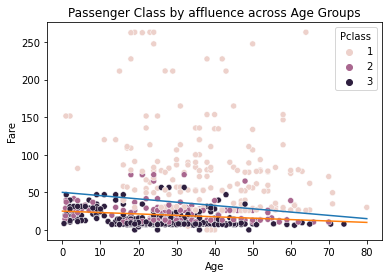

<Figure size 2520x1440 with 0 Axes>

In [ ]:
fares = df['Fare']
age = df['Age']
pclass = df['Pclass']
 
sns.scatterplot(age,fares,hue=pclass)
plt.title('Passenger Class by affluence across Age Groups')
plt.plot([0,80],[50,15]) #Gaussian NB
plt.plot([0,80],[25,10])
plt.figure(figsize=(35,20))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 2520x1440 with 0 Axes>

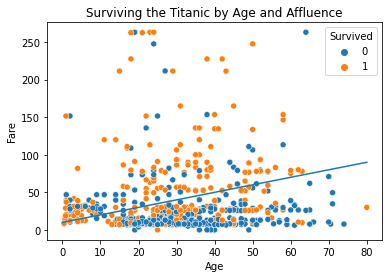

<Figure size 2520x1440 with 0 Axes>

In [ ]:
fares = df['Fare']
age = df['Age'][::-1]
pclass = df['Pclass']
survv = df['Survived']
 
sns.scatterplot(age,fares,hue=survv)
plt.title('Surviving the Titanic by Age and Affluence')
plt.plot([0,80],[10,90]) #Logistic Regression
plt.figure(figsize=(35,20))

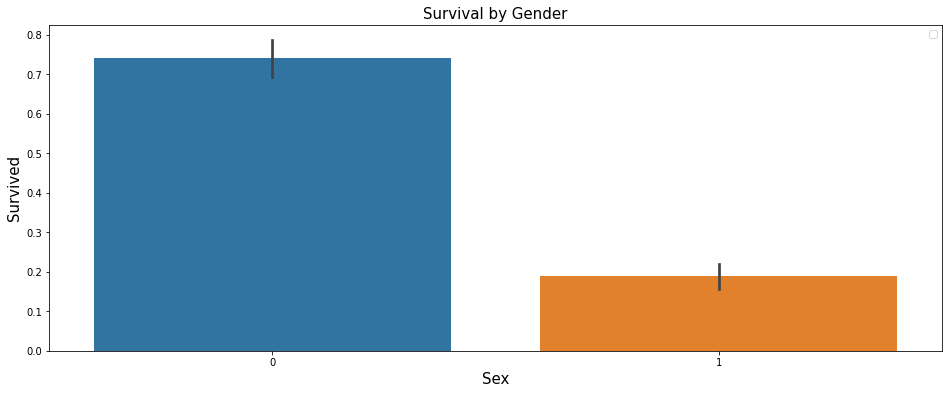

In [ ]:
gender = df['Sex']
survival = df['Survived']
 
 
plt.figure(figsize=(16,6))
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Survived', fontsize=15)
plt.title('Survival by Gender',fontsize=15)
plt.legend(['blue','orange'],loc="upper right")
sns.barplot(x=gender,y=survival)

**Key Detail on the graph: Survival by Social Class**
- Pclass 1 = First Class
- Pclass 2 = Second Class
- Pclass 3 = Third Class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  




SURVIVAL BY SOCIAL CLASS




<Figure size 1152x432 with 0 Axes>

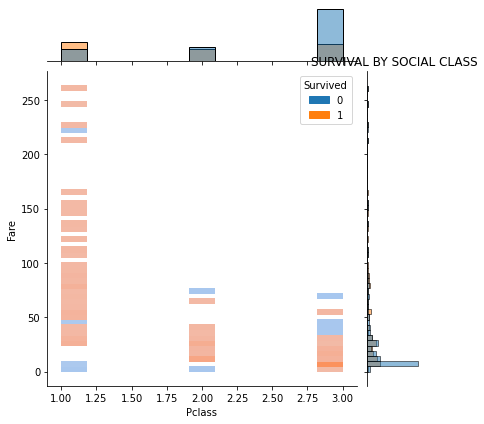

<Figure size 1152x432 with 0 Axes>

In [ ]:
#removing outlier
df['Fare'][df['Fare'][df['Fare']>400].index] = 100
 
 
print('\n\nSURVIVAL BY SOCIAL CLASS\n\n')#Plot
sns.jointplot(x=pclass,y=fares, kind='hist', hue=survival)
plt.xlabel('pclass',fontsize=25)
plt.ylabel('Fare',fontsize=25)
plt.title('SURVIVAL BY SOCIAL CLASS')
 
plt.figure(figsize=(16,6))